<a href="https://colab.research.google.com/github/Tar-ive/STOCKS/blob/code/Portfolio_Optimization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
!pip install yfinance

In [76]:
!pip install quantstats

In [77]:
!pip install pyportfolioopt

In [78]:
!pip install ta


In [79]:
import pandas as pd
from pandas_datareader import data
import numpy as np
from scipy import stats

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Optimization and allocation
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import black_litterman, BlackLittermanModel

# Financial data
import quantstats as qs
import ta
import yfinance as yf

# Linear Regression Model
from sklearn.linear_model import LinearRegression
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Datetime and hiding warnings
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [80]:
nvda = qs.utils.download_returns('NVDA')
nvda = nvda.loc['2010-07-01':'2024-03-02']

aapl = qs.utils.download_returns('AAPL')
aapl = aapl.loc['2010-07-01':'2024-03-02']

msft = qs.utils.download_returns('MSFT')
msft = msft.loc['2010-07-01':'2024-03-02']

amzn = qs.utils.download_returns('AMZN')
amzn = amzn.loc['2010-07-01':'2024-03-02']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [81]:
nvda.index = nvda.index.tz_localize(None)
aapl.index = aapl.index.tz_localize(None)
msft.index = msft.index.tz_localize(None)
amzn.index = amzn.index.tz_localize(None)

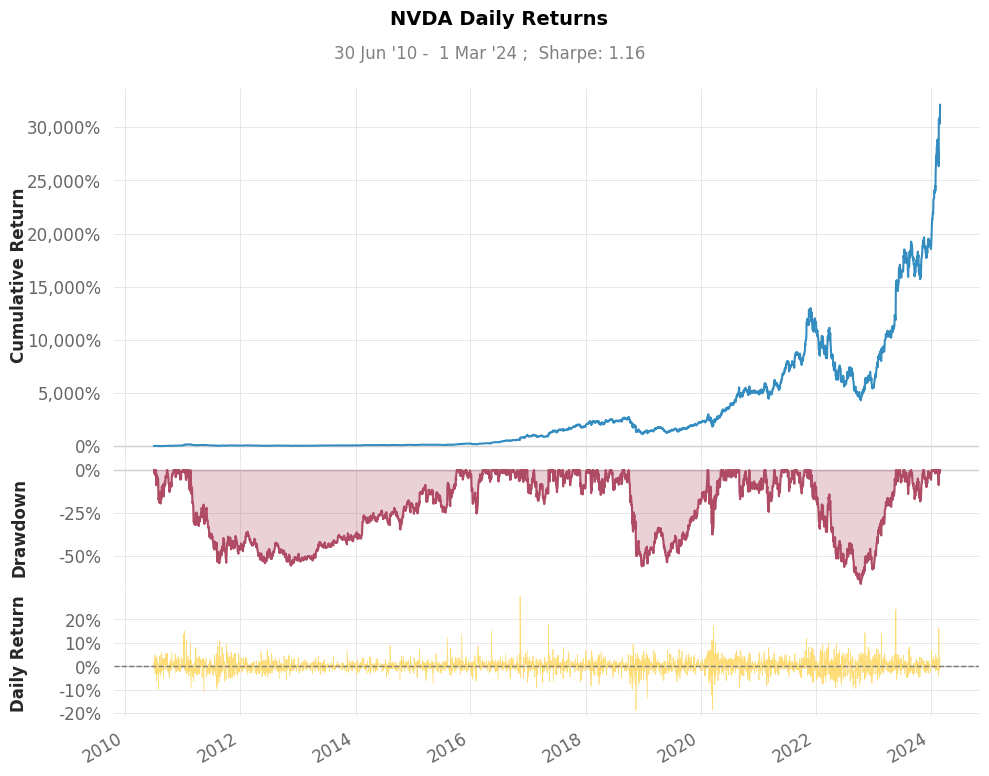

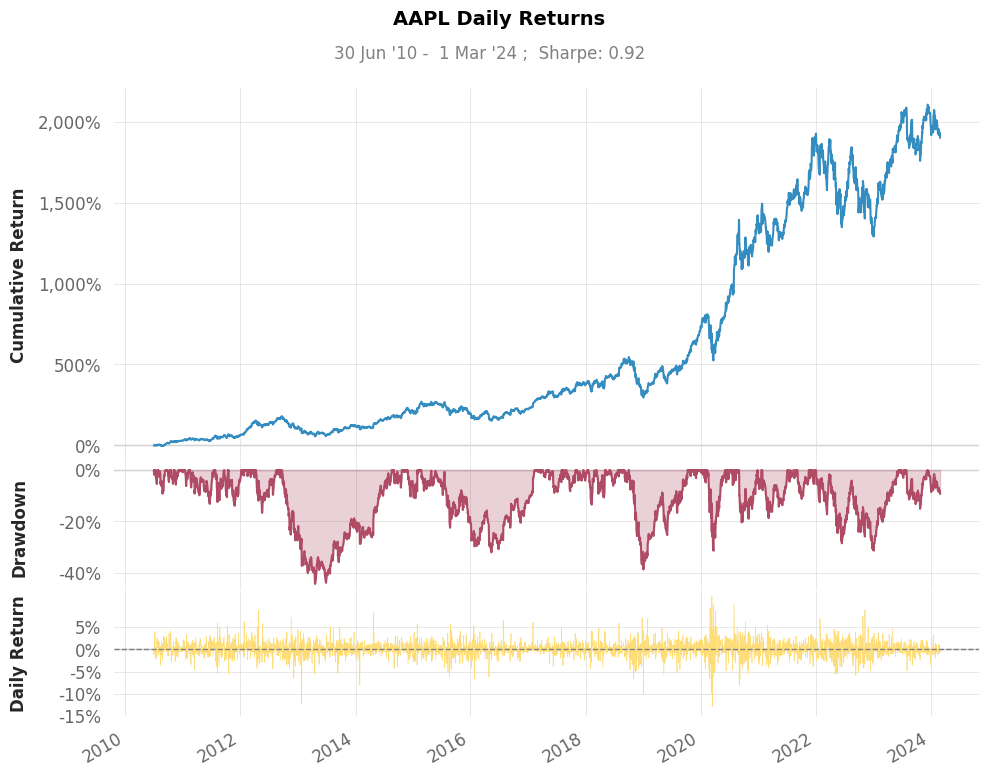

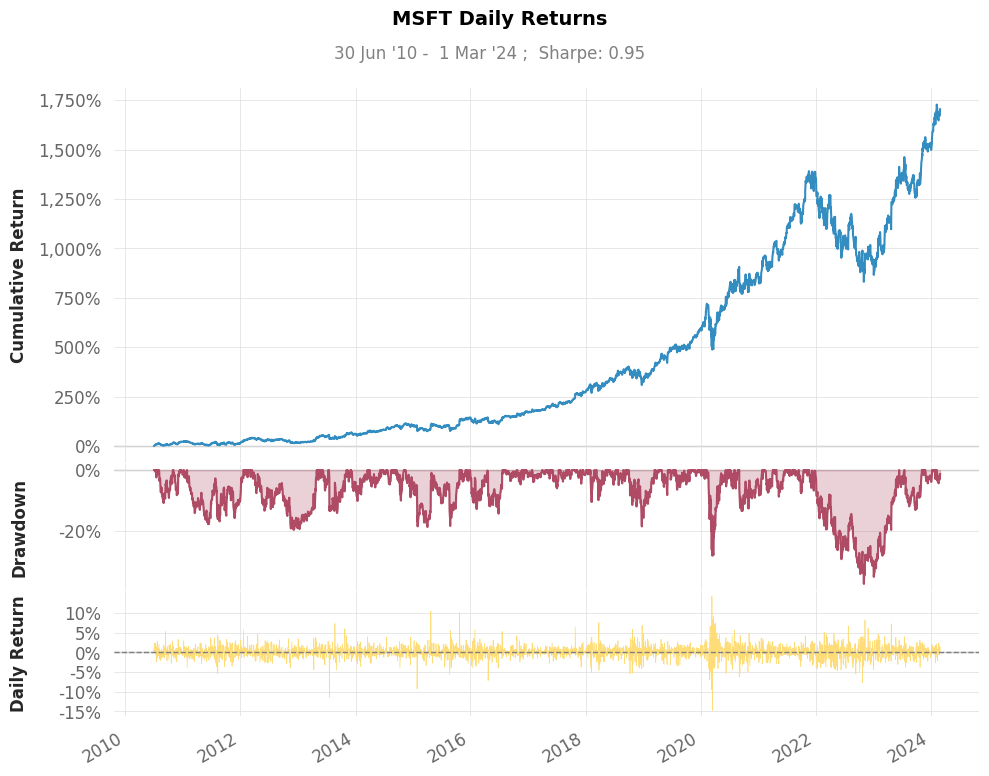

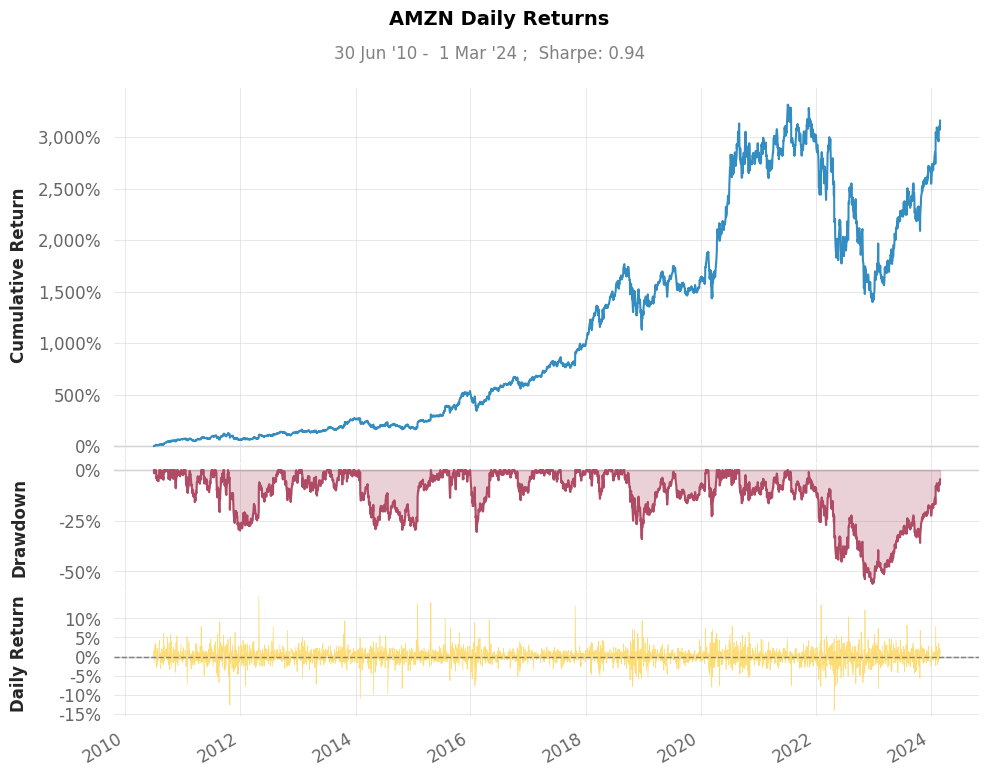

In [82]:
# Plot daily returns using QuantStats
qs.plots.snapshot(nvda, title="NVDA Daily Returns")
qs.plots.snapshot(aapl, title="AAPL Daily Returns")
qs.plots.snapshot(msft, title="MSFT Daily Returns")
qs.plots.snapshot(amzn, title="AMZN Daily Returns")

NVDA : 9.098530710244443
AAPL : 5.380088951360213
MSFT : 7.822095081349172
AMZN :  6.544205528406113


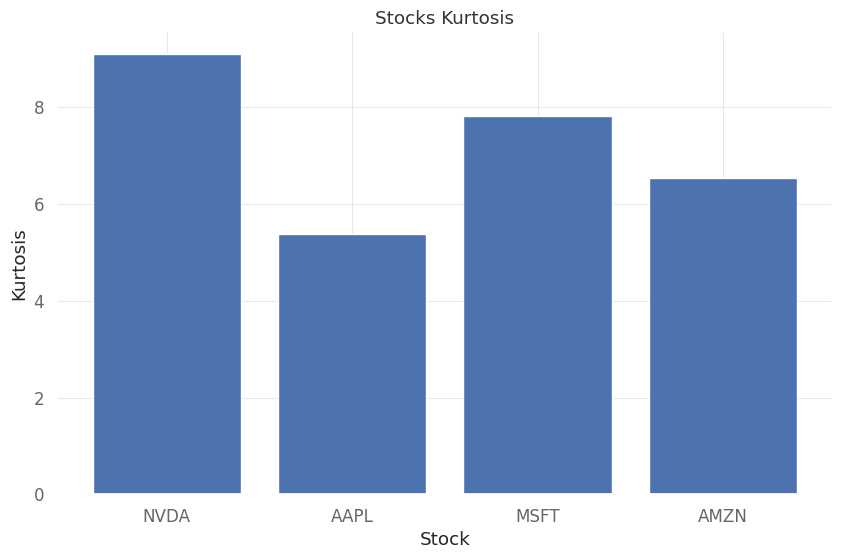

In [83]:
# Calculate kurtosis
kurtosis_nvda = qs.stats.kurtosis(nvda)
kurtosis_aapl = qs.stats.kurtosis(aapl)
kurtosis_msft = qs.stats.kurtosis(msft)
kurtosis_amzn = qs.stats.kurtosis(amzn)

print("NVDA :" ,kurtosis_nvda)
print("AAPL :" ,kurtosis_aapl)
print ("MSFT :",kurtosis_msft)
print ('AMZN : ',kurtosis_amzn)


# Plot kurtosis
stocks = ['NVDA', 'AAPL', 'MSFT', 'AMZN']
kurtosis_values = [kurtosis_nvda, kurtosis_aapl, kurtosis_msft, kurtosis_amzn]

plt.bar(stocks, kurtosis_values)
plt.title('Stocks Kurtosis')
plt.xlabel('Stock')
plt.ylabel('Kurtosis')
plt.show()

Skewness NVDA: 0.7120461245265246
Skewness AAPL: -0.06412751128963619
Skewness MSFT: 0.06011107218214345
Skewness AMZN: 0.3097175861733701


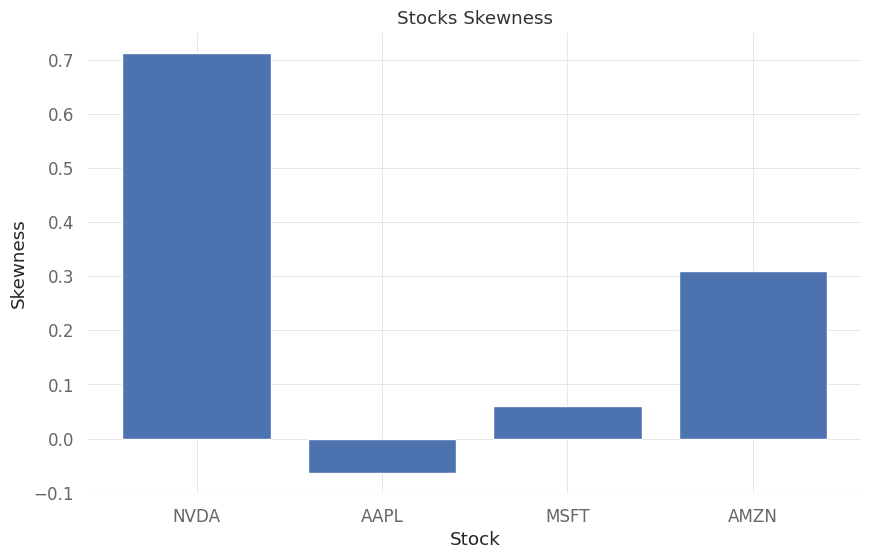

In [84]:
# Calculate skewness
skewness_nvda = qs.stats.skew(nvda)
skewness_aapl = qs.stats.skew(aapl)
skewness_msft = qs.stats.skew(msft)
skewness_amzn = qs.stats.skew(amzn)

# Output skewness
print("Skewness NVDA:", skewness_nvda)
print("Skewness AAPL:", skewness_aapl)
print("Skewness MSFT:", skewness_msft)
print("Skewness AMZN:", skewness_amzn)

# Plot skewness
stocks = ['NVDA', 'AAPL', 'MSFT', 'AMZN']
skewness_values = [skewness_nvda, skewness_aapl, skewness_msft, skewness_amzn]

plt.bar(stocks, skewness_values)
plt.title('Stocks Skewness')
plt.xlabel('Stock')
plt.ylabel('Skewness')
plt.show()

NVDA Skewness: 0.7120461245265246
AAPL Skewness: -0.06412751128963619
MSFT Skewness: 0.06011107218214345
AMZN Skewness: 0.3097175861733701


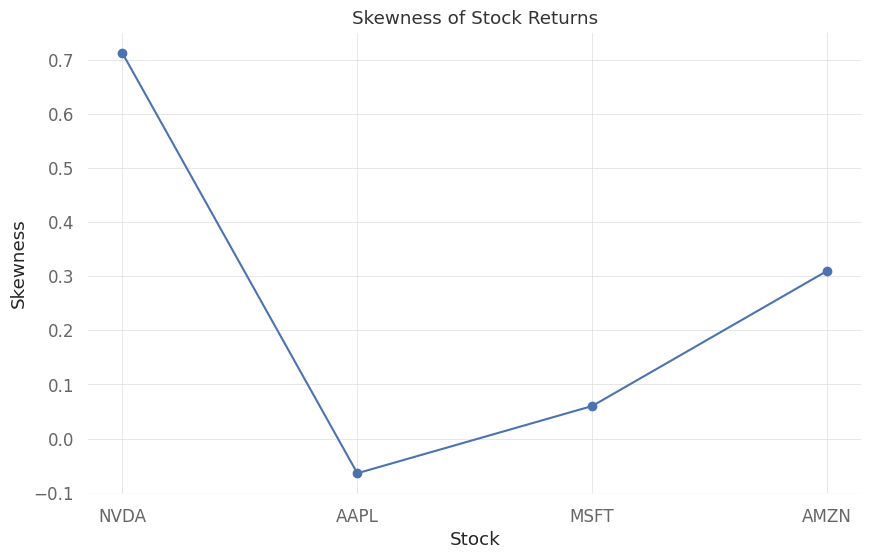

In [85]:
skew_nvda = qs.stats.skew(nvda)
skew_aapl = qs.stats.skew(aapl)
skew_msft = qs.stats.skew(msft)
skew_amzn = qs.stats.skew(amzn)

# Output skewness
print(f"NVDA Skewness: {skew_nvda}")
print(f"AAPL Skewness: {skew_aapl}")
print(f"MSFT Skewness: {skew_msft}")
print(f"AMZN Skewness: {skew_amzn}")

# Plot skewness curves
plt.figure(figsize=(10, 6))
plt.plot(['NVDA', 'AAPL', 'MSFT', 'AMZN'], [skew_nvda, skew_aapl, skew_msft, skew_amzn], marker='o')
plt.title('Skewness of Stock Returns')
plt.xlabel('Stock')
plt.ylabel('Skewness')
plt.grid(True)
plt.show()

In [86]:
std_dev = {
    "NVDA": nvda.std(),
    "AAPL": aapl.std(),
    "MSFT": msft.std(),
    "AMZN": amzn.std()
}

mean = {
    "NVDA": nvda.mean(),
    "AAPL": aapl.mean(),
    "MSFT": msft.mean(),
    "AMZN": amzn.mean()
}


# Create DataFrame
data = pd.DataFrame({
    "Stock": ["NVDA", "AAPL", "MSFT", "AMZN"],
    "Standard Deviation": [std_dev["NVDA"], std_dev["AAPL"], std_dev["MSFT"], std_dev["AMZN"]],
    "Mean": [mean["NVDA"], mean["AAPL"], mean["MSFT"], mean["AMZN"]]
})

# Output table
data

,Stock,Standard Deviation,Mean
0,NVDA,0.028337,0.002077
1,AAPL,0.017629,0.001027
2,MSFT,0.016341,0.000975
3,AMZN,0.020727,0.001228


In [87]:
merged_daily_returns = pd.concat([nvda, aapl, msft, amzn], axis=1, keys=['NVDA', 'AAPL', 'MSFT', 'AMZN'])


In [88]:
merged_daily_returns

,NVDA,AAPL,MSFT,AMZN
Date,,,,
2010-07-01,0.016650,-0.012126,0.006519,0.015559
2010-07-02,-0.012524,-0.006198,0.004750,-0.016402
2010-07-06,-0.010732,0.006844,0.023636,0.008430
2010-07-07,0.048323,0.040381,0.020151,0.030620
2010-07-08,-0.030103,-0.002242,0.004527,0.024597
...,...,...,...,...
2024-02-26,0.003489,-0.007451,-0.006824,-0.001486
2024-02-27,-0.004944,0.008114,-0.000147,-0.006811
2024-02-28,-0.013189,-0.006625,0.000589,-0.002190


In [89]:
merged_df = merged_daily_returns

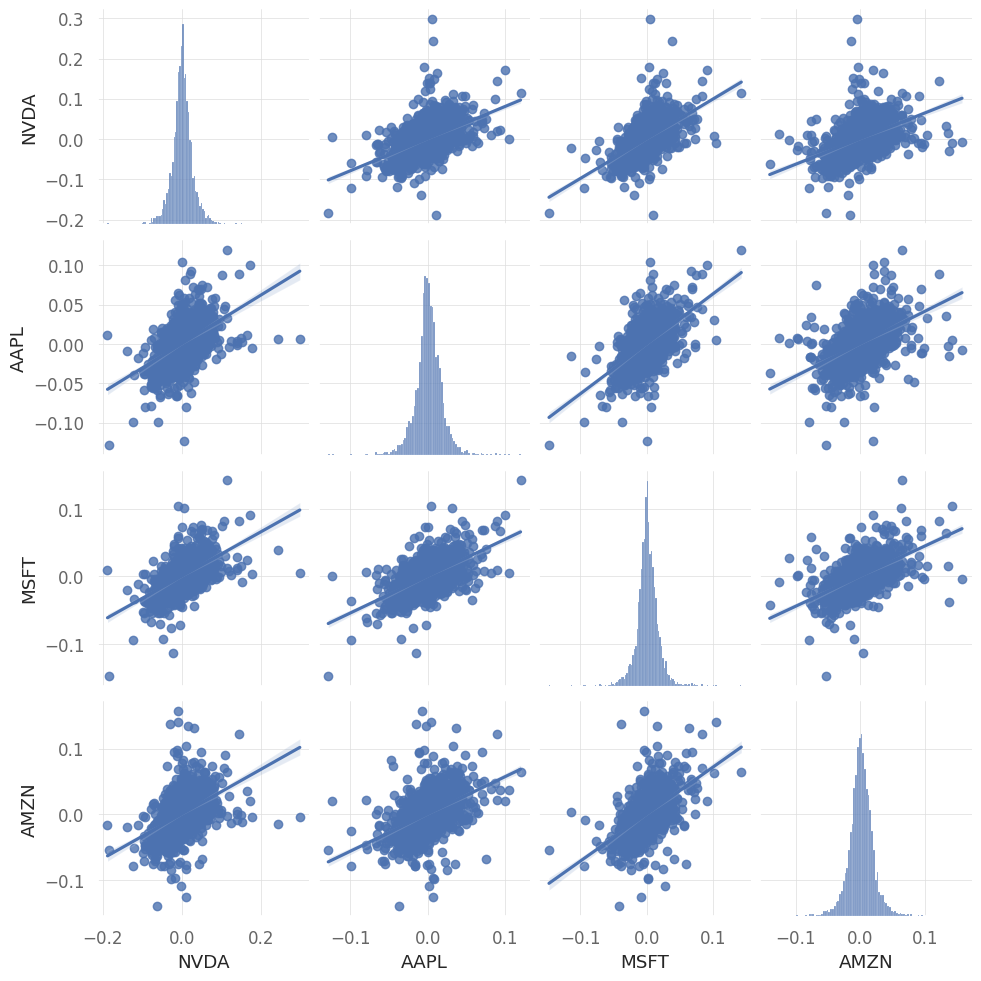

In [90]:
sns.pairplot(merged_df, kind = 'reg')
plt.show()

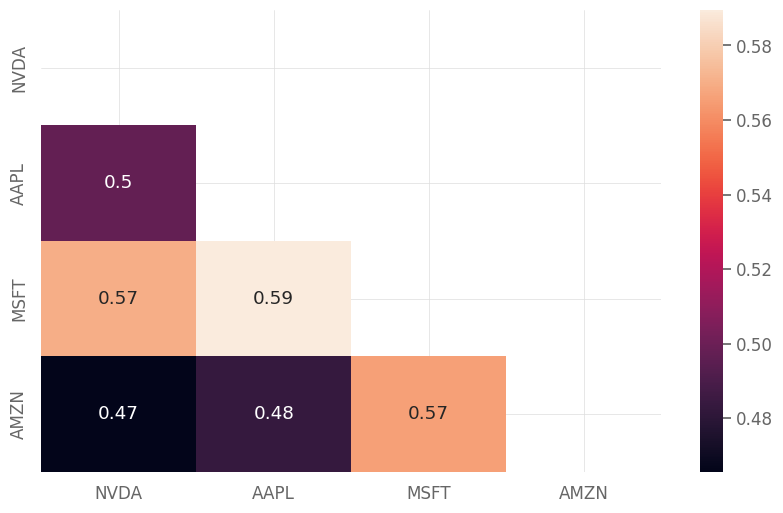

In [91]:
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, mask=mask)
plt.show()

In [92]:
sp500 = qs.utils.download_returns('^GSPC')
sp500 = sp500.loc['2010-07-01':'2024-03-02']
sp500.index = sp500.index.tz_localize(None)
sp500

[*********************100%%**********************]  1 of 1 completed


Date
2010-07-01   -0.003240
2010-07-02   -0.004662
2010-07-06    0.005359
2010-07-07    0.031331
2010-07-08    0.009413
                ...   
2024-02-26   -0.003787
2024-02-27    0.001706
2024-02-28   -0.001658
2024-02-29    0.005229
2024-03-01    0.008008
Name: Close, Length: 3440, dtype: float64

In [93]:
sp500_no_index = sp500.reset_index(drop = True)
aapl_no_index = aapl.reset_index(drop = True)
nvda_no_index = nvda.reset_index(drop = True)
msft_no_index = msft.reset_index(drop = True)
amzn_no_index = amzn.reset_index(drop = True)

In [94]:
sp500_no_index

0      -0.003240
1      -0.004662
2       0.005359
3       0.031331
4       0.009413
          ...   
3435   -0.003787
3436    0.001706
3437   -0.001658
3438    0.005229
3439    0.008008
Name: Close, Length: 3440, dtype: float64

In [95]:
X = sp500_no_index.values.reshape(-1,1)
y = aapl_no_index.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('AAPL beta: ', beta.round(3))
print('\nAAPL alpha: ', alpha.round(3))



AAPL beta:  [1.11]

AAPL alpha:  [0.]


In [96]:
np.random.seed(0)  # For reproducibility
sp500_no_index = pd.Series(np.random.randn(100))
nvda_no_index = sp500_no_index * 1.5 + np.random.randn(100) * 0.5
aapl_no_index = sp500_no_index * 1.2 + np.random.randn(100) * 0.5
msft_no_index = sp500_no_index * 1.3 + np.random.randn(100) * 0.5
amzn_no_index = sp500_no_index * 1.4 + np.random.randn(100) * 0.5

# Define a function to compute alpha and beta using the specified attribute access
def compute_alpha_beta(X, y):
    linreg = LinearRegression().fit(X, y)
    beta = linreg.coef_[0]
    alpha = linreg.intercept_
    return alpha, beta

# Calculate alpha and beta for each stock
alphas_betas = []
for stock_no_index in [nvda_no_index, aapl_no_index, msft_no_index, amzn_no_index]:
    X = sp500_no_index.values.reshape(-1,1)
    y = stock_no_index.values.reshape(-1,1)
    alpha, beta = compute_alpha_beta(X, y)
    alphas_betas.append((alpha, beta))

# Creating a DataFrame to display alpha and beta
stocks = ['NVDA', 'AAPL', 'MSFT', 'AMZN']
results_df = pd.DataFrame(alphas_betas, columns=['Alpha', 'Beta'], index=stocks)

# Print the results in a table
results_df

,Alpha,Beta
NVDA,[0.03757654252625718],[1.5573492167731897]
AAPL,[-0.03176610536786364],[1.235947942241829]
MSFT,[-0.0967469988226766],[1.272389078027068]
AMZN,[-0.0053323454136097875],[1.3841198124137455]


In [97]:
sharpe_nvda = qs.stats.sharpe(nvda)
sharpe_aapl = qs.stats.sharpe(aapl)
sharpe_msft = qs.stats.sharpe(msft)
sharpe_amzn = qs.stats.sharpe(amzn)

In [98]:
stocks = ['NVDA', 'AAPL', 'MSFT', 'AMZN']
sharpe_ratios = [sharpe_nvda, sharpe_aapl, sharpe_msft, sharpe_amzn]
sharpe_df = pd.DataFrame(sharpe_ratios, index=stocks, columns=['Sharpe Ratio'])


In [99]:
sharpe_df

,Sharpe Ratio
NVDA,1.163693
AAPL,0.924520
MSFT,0.947132
AMZN,0.940190


In [100]:
weights = [0.25, 0.25, 0.25, 0.25]

In [101]:
portfolio = nvda*weights[0] + aapl*weights[1] + msft*weights[2] + amzn*weights[3]

In [102]:
portfolio

Date
2010-07-01    0.006651
2010-07-02   -0.007594
2010-07-06    0.007044
2010-07-07    0.034869
2010-07-08   -0.000806
                ...   
2024-02-26   -0.003068
2024-02-27   -0.000947
2024-02-28   -0.005354
2024-02-29    0.012569
2024-03-01    0.011689
Name: Strategy, Length: 3440, dtype: float64

[Performance Metrics]



                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2010-07-01   2010-07-01
End Period                 2024-03-01   2024-03-01
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          398.40%      5,824.45%
CAGR﹪                     8.45%        22.88%

Sharpe                     0.77         1.26
Prob. Sharpe Ratio         99.73%       100.0%
Smart Sharpe               0.71         1.17
Sortino                    1.07         1.86
Smart Sortino              0.99         1.72
Sortino/√2                 0.76         1.31
Smart Sortino/√2           0.7          1.21
Omega                      1.25         1.25

Max Drawdown               -33.92%      -42.27%
Longest DD Days            745          551
Volatility (ann.)          17.34%       26.5%
R^2                        0.67         0.67
Information Ratio          0.08         0.08
Calmar           

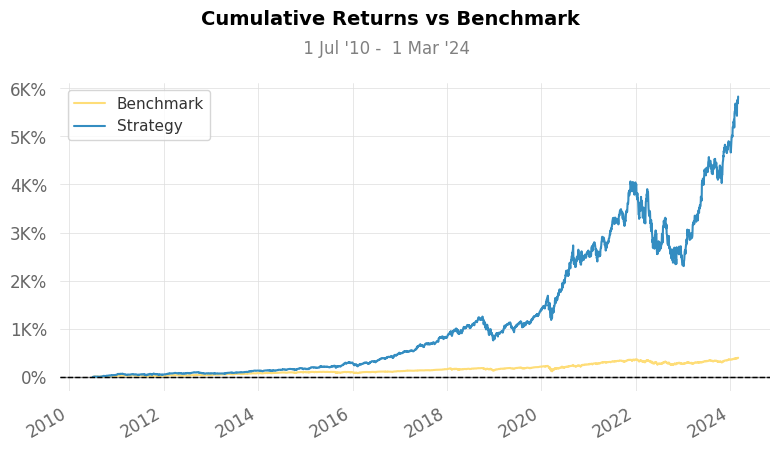

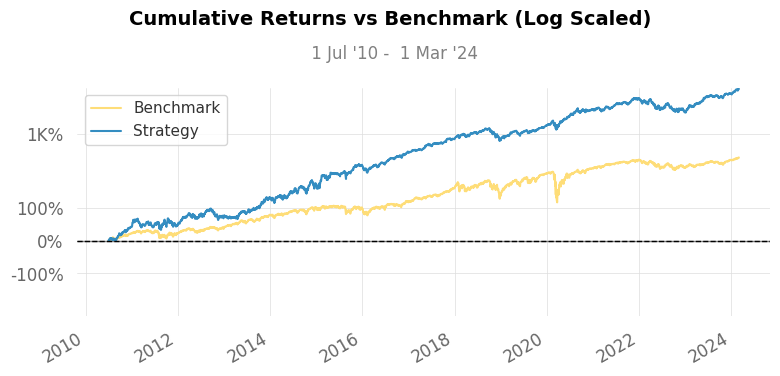

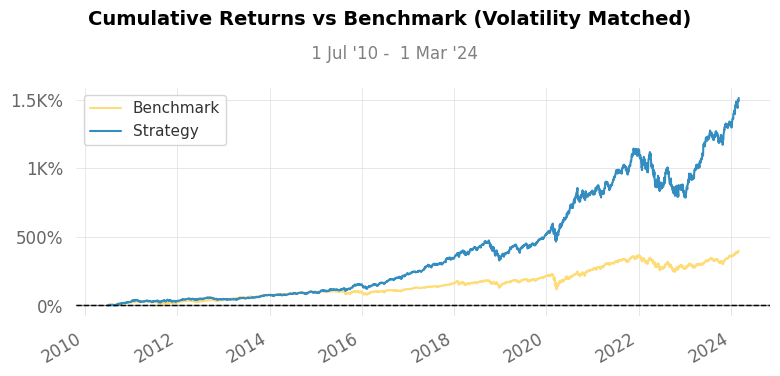

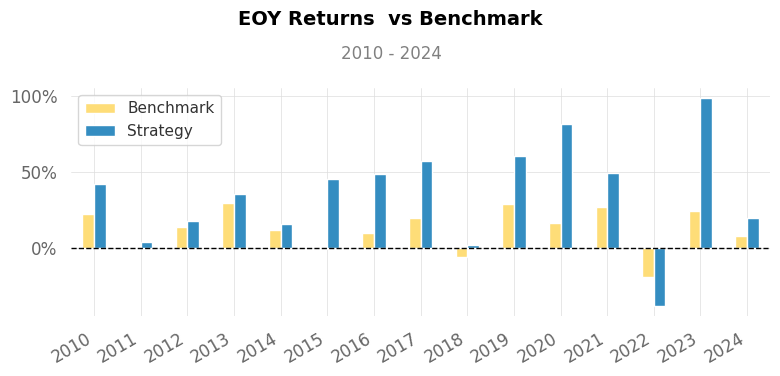

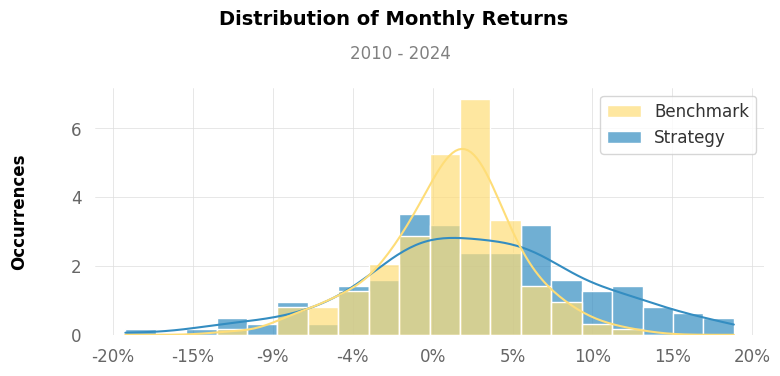

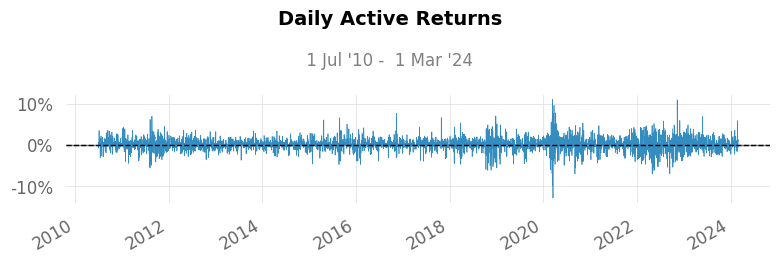

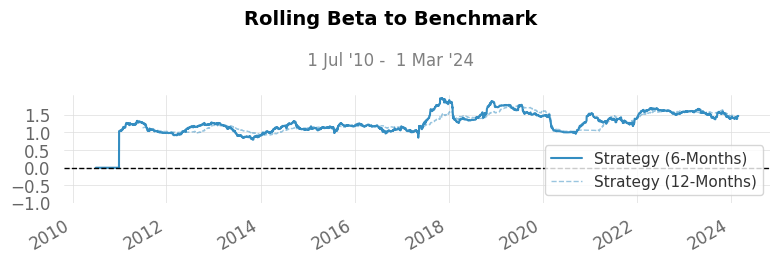

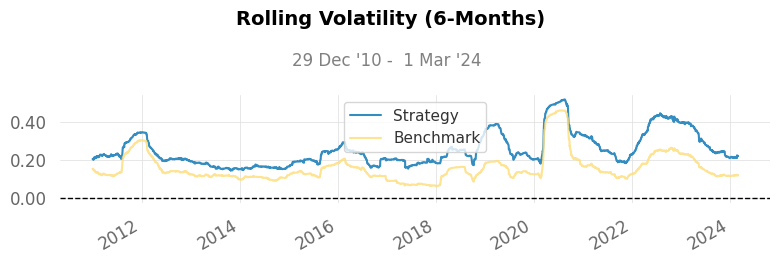

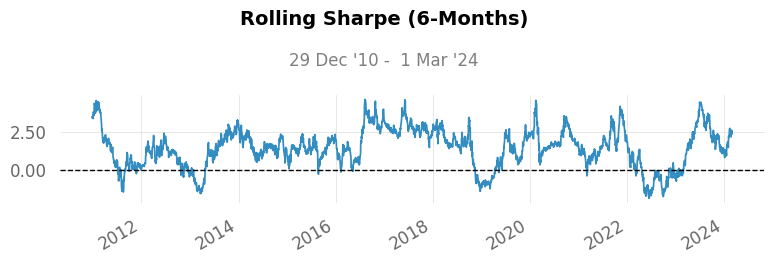

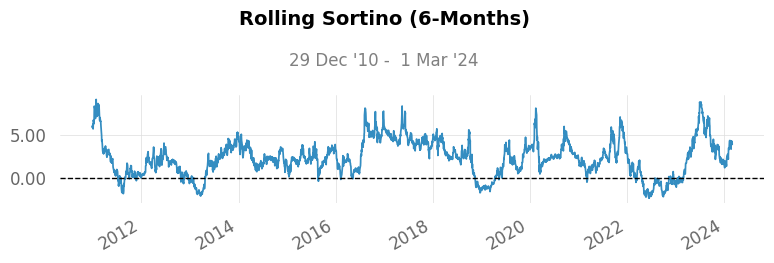

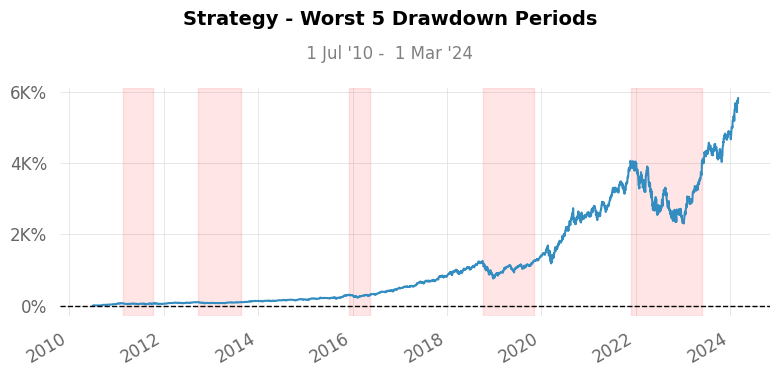

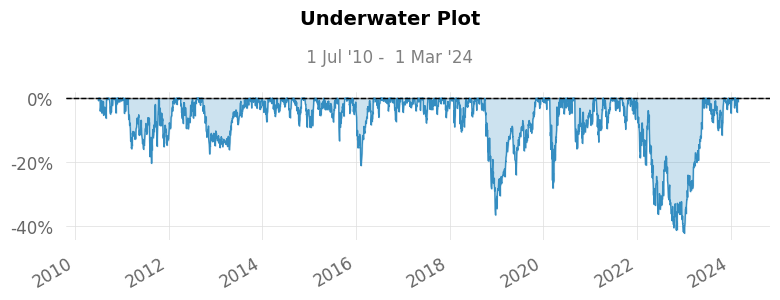

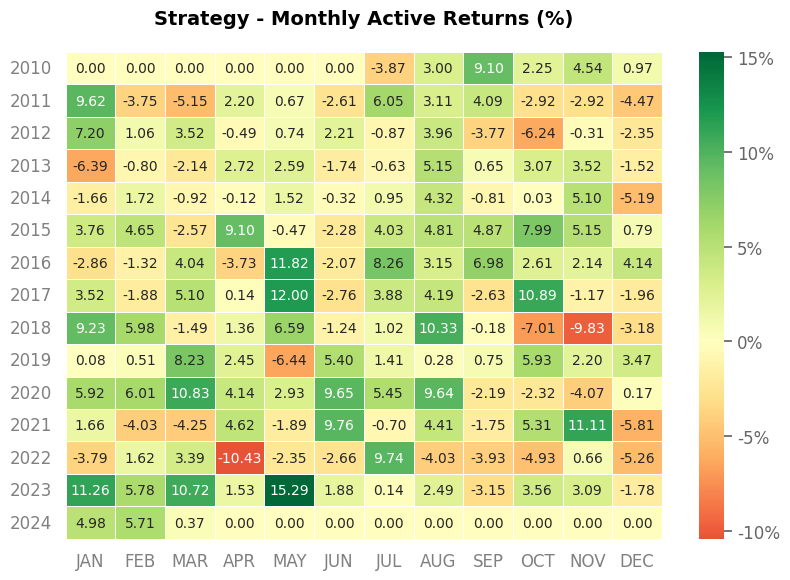

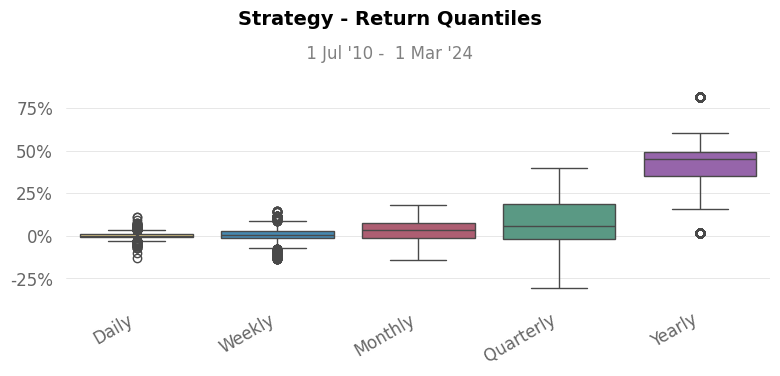

In [103]:
qs.reports.full(portfolio, benchmark = sp500)


In [104]:
aapl_df = yf.download('AAPL', start = '2010-07-01', end = '2024-03-02')
nvda_df = yf.download('NVDA', start = '2010-07-01', end = '2024-03-02')
msft_df = yf.download('MSFT', start = '2010-07-01', end = '2024-03-02')
amzn_df = yf.download('AMZN', start = '2010-07-01', end = '2024-03-02')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [105]:
aapl_df = aapl_df['Adj Close']
nvda_df = nvda_df['Adj Close']
msft_df = msft_df['Adj Close']
amzn_df = amzn_df['Adj Close']

In [106]:
df = pd.concat([aapl_df, nvda_df, msft_df, amzn_df], join = 'outer', axis = 1)
df.columns = ['AAPL', 'NVDA', 'MSFT', 'AMZN']

In [107]:
df

,AAPL,NVDA,MSFT,AMZN
Date,,,,
2010-07-01,7.512964,2.380399,17.695423,5.548000
2010-07-02,7.466403,2.350587,17.779461,5.457000
2010-07-06,7.517501,2.325361,18.199701,5.503000
2010-07-07,7.821067,2.437730,18.566446,5.671500
2010-07-08,7.803530,2.364346,18.650494,5.811000
...,...,...,...,...
2024-02-26,181.160004,790.882874,407.540009,174.729996
2024-02-27,182.630005,786.973083,407.480011,173.539993
2024-02-28,181.419998,776.593567,407.720001,173.160004


In [108]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [109]:
mu = expected_returns.mean_historical_return(df) #expected returns
S = risk_models.sample_cov(df)

In [110]:
mu

AAPL    0.261894
NVDA    0.534697
MSFT    0.260206
AMZN    0.289482
dtype: float64

In [111]:
S

,AAPL,NVDA,MSFT,AMZN
AAPL,0.078247,0.062645,0.042890,0.044523
NVDA,0.062645,0.202360,0.066444,0.068943
MSFT,0.042890,0.066444,0.067153,0.048256
AMZN,0.044523,0.068943,0.048256,0.108273


In [112]:
ef = EfficientFrontier(mu, S) # Providing expected returns and covariance matrix as input
weights = ef.max_sharpe() # Optimizing weights for Sharpe ratio maximization

clean_weights = ef.clean_weights() # clean_weights rounds the weights and clips near-zeros

# Printing optimized weights and expected performance for portfolio
clean_weights

OrderedDict([('AAPL', 0.20851),
             ('NVDA', 0.44149),
             ('MSFT', 0.19363),
             ('AMZN', 0.15637)])

In [113]:
new_weights = [0.70828, 0.29172]
optimized_portfolio = aapl*new_weights[0] + nvda*new_weights[1]
optimized_portfolio

Date
2010-07-01   -0.003731
2010-07-02   -0.008043
2010-07-06    0.001717
2010-07-07    0.042698
2010-07-08   -0.010370
                ...   
2024-02-26   -0.004260
2024-02-27    0.004305
2024-02-28   -0.008540
2024-02-29    0.002827
2024-03-01    0.007407
Name: Strategy, Length: 3440, dtype: float64

[Performance Metrics]

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2010-07-01   2010-07-01
End Period                 2024-03-01   2024-03-01
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          5,824.45%    5,477.16%
CAGR﹪                     22.88%       22.51%

Sharpe                     1.26         1.17
Prob. Sharpe Ratio         100.0%       100.0%
Smart Sharpe               1.18         1.1
Sortino                    1.86         1.73
Smart Sortino              1.74         1.62
Sortino/√2                 1.31         1.22
Smart Sortino/√2           1.23         1.15
Omega                      1.23         1.23

Max Drawdown               -42.27%      -43.5%
Longest DD Days            551          604
Volatility (ann.)          26.5%        28.7%
R^2                        0.84         0.84
Information Ratio          0.0          0

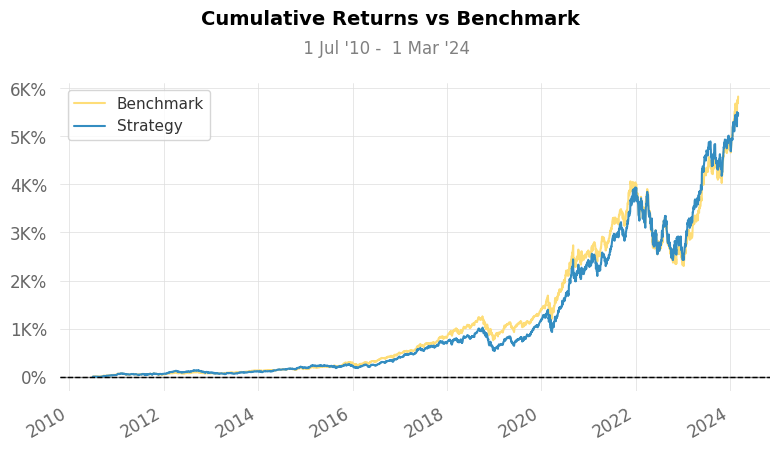

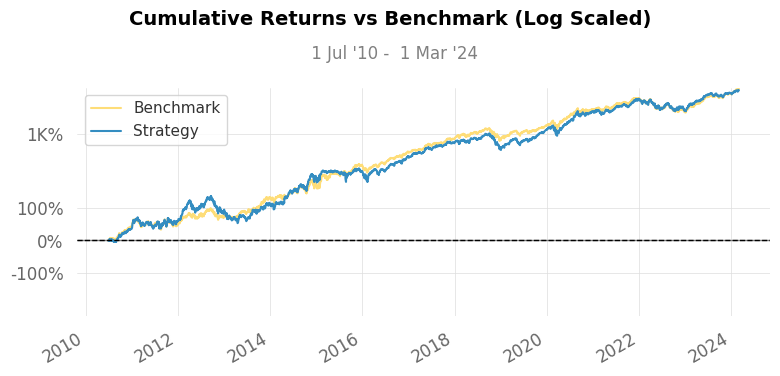

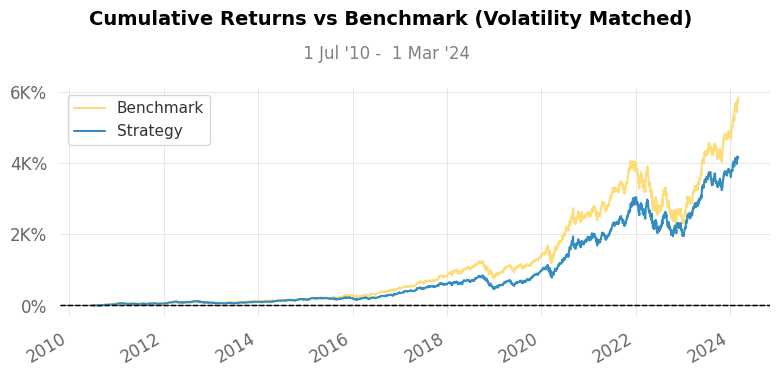

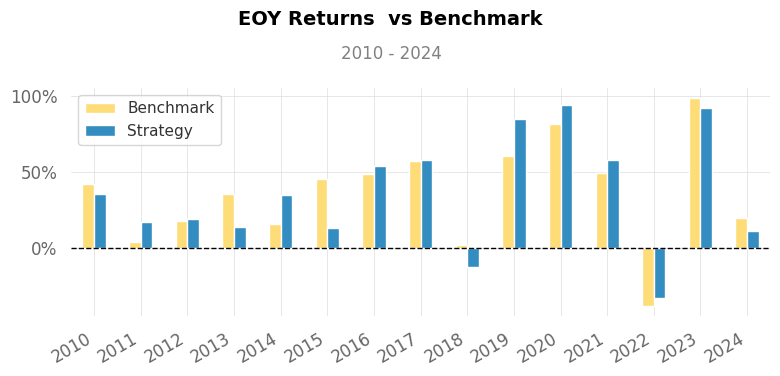

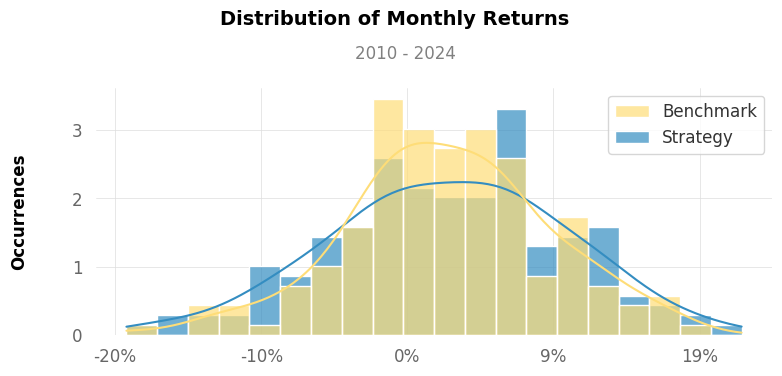

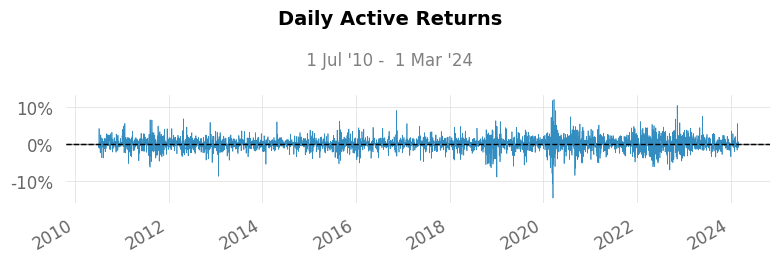

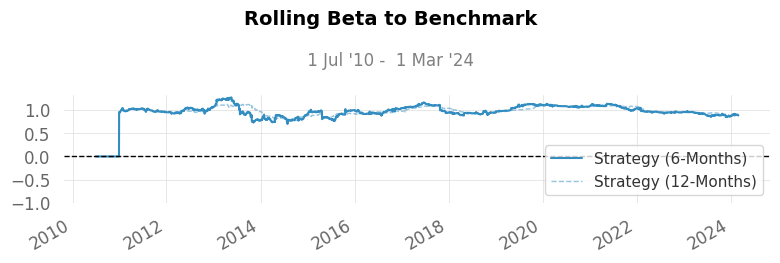

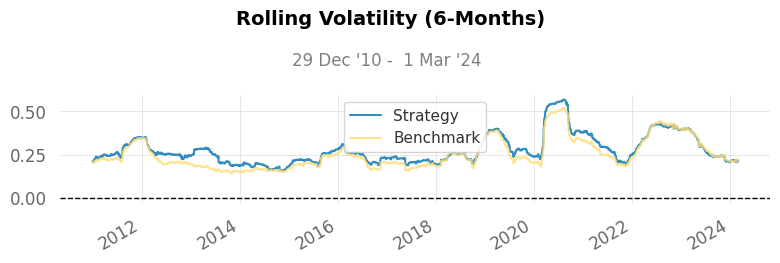

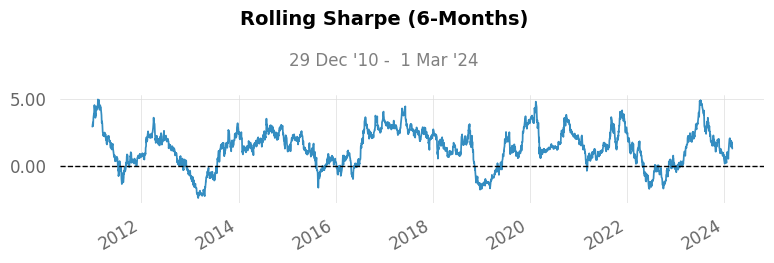

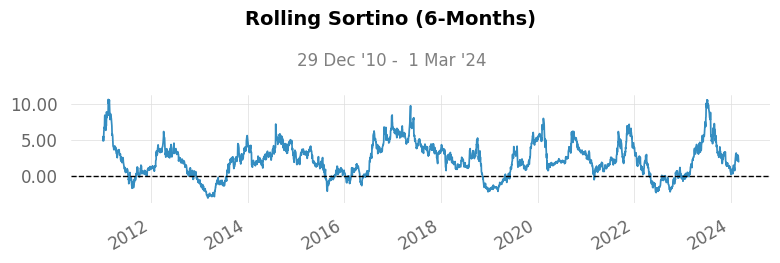

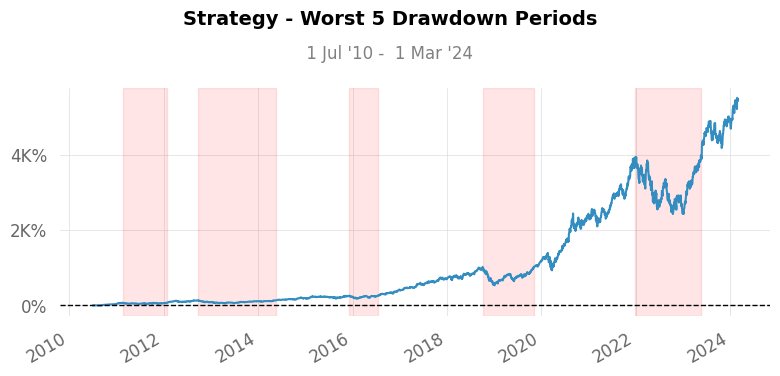

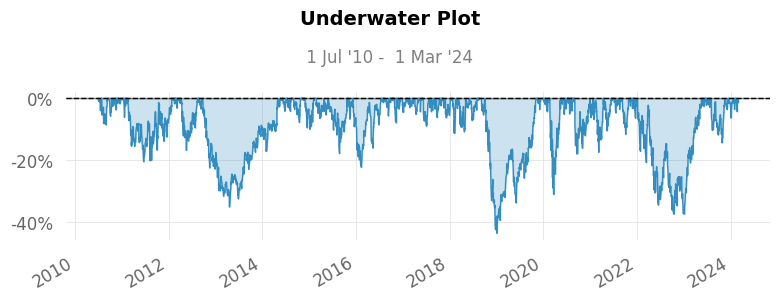

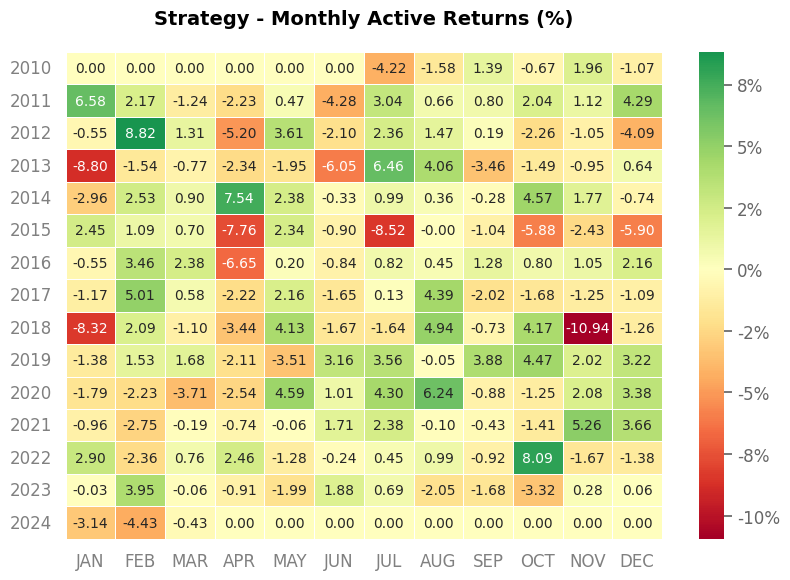

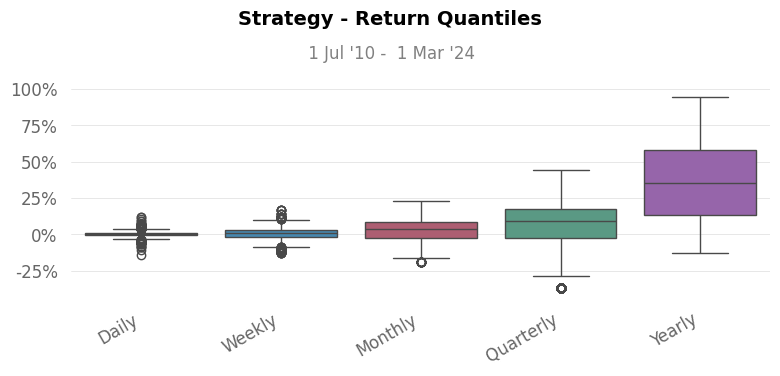

In [114]:
qs.reports.full(optimized_portfolio, benchmark = portfolio)

In [115]:
assets = ['AAPL', 'NVDA', 'MSFT', 'AMZN']

In [116]:
data = yf.Tickers(assets)


In [117]:
market_caps = {asset: data.tickers[asset].info['marketCap'] for asset in assets}

In [118]:
market_caps_df = pd.DataFrame(list(market_caps.items()), columns=['Asset', 'Market Cap'])

market_caps_df

,Asset,Market Cap
0,AAPL,2675000213504
1,NVDA,2297825067008
2,MSFT,3085713014784
3,AMZN,1821846011904


In [119]:
import yfinance as yf

# Download S&P 500 Index adjusted closing prices
market_prices = yf.download("^GSPC", start='2010-07-01', end='2024-03-02')['Adj Close']

# Display the data
print(market_prices)


[*********************100%%**********************]  1 of 1 completed

Date
2010-07-01    1027.369995
2010-07-02    1022.580017
2010-07-06    1028.060059
2010-07-07    1060.270020
2010-07-08    1070.250000
                 ...     
2024-02-26    5069.529785
2024-02-27    5078.180176
2024-02-28    5069.759766
2024-02-29    5096.270020
2024-03-01    5137.080078
Name: Adj Close, Length: 3440, dtype: float64


In [121]:
delta = black_litterman.market_implied_risk_aversion(market_prices)
delta

3.758227434599922

In [122]:
S

,AAPL,NVDA,MSFT,AMZN
AAPL,0.078247,0.062645,0.042890,0.044523
NVDA,0.062645,0.202360,0.066444,0.068943
MSFT,0.042890,0.066444,0.067153,0.048256
AMZN,0.044523,0.068943,0.048256,0.108273


In [123]:
prior = black_litterman.market_implied_prior_returns(market_caps, delta, S)
prior

AAPL    0.235565
NVDA    0.386373
MSFT    0.233975
AMZN    0.257231
dtype: float64

In [126]:
Q = np.array([0.05, 0.10, 0.02])

In [127]:
P = np.array([
    [1,0,0,0], # APPL = 0.05
    [0,1,0,0], # NVDA = 0.10
    [0,0,-1,1] # AMZN > MSFT by 0.02
])

In [128]:
confidences = [0.5,
               0.8,
               0.3]


In [129]:
bl = BlackLittermanModel(S, # Covariance Matrix
                         pi = prior, # Prior expected returns
                         Q = Q, # Vector of views
                         P = P, # Matrix mapping the views
                         omega = 'idzorek', # Method to estimate uncertainty level of the views based on historical data
                         view_confidences = confidences)

In [130]:
rets = bl.bl_returns() # Calculating Expected returns
ef = EfficientFrontier(rets, S)

In [131]:
ef.max_sharpe() # Optimizing weights for maximal Sharpe ratio
weights = ef.clean_weights() # Cleaning weights
weights # Printing weights

OrderedDict([('AAPL', 0.0924),
             ('NVDA', 0.0),
             ('MSFT', 0.56749),
             ('AMZN', 0.34011)])

In [132]:
black_litterman_weights = [0.62588,
                          0.19951,
                          0.016,
                          0.15861]
black_litterman_portfolio = aapl*black_litterman_weights[0] + nvda*black_litterman_weights[1] + msft*black_litterman_weights[2] + amzn*black_litterman_weights[3]

In [133]:
black_litterman_portfolio

Date
2010-07-01   -0.001695
2010-07-02   -0.008903
2010-07-06    0.003857
2010-07-07    0.040094
2010-07-08   -0.003436
                ...   
2024-02-26   -0.004312
2024-02-27    0.003010
2024-02-28   -0.007116
2024-02-29    0.004941
2024-03-01    0.005594
Name: Strategy, Length: 3440, dtype: float64

[Performance Metrics]



                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2010-07-01   2010-07-01
End Period                 2024-03-01   2024-03-01
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          5,824.45%    4,678.85%
CAGR﹪                     22.88%       21.56%

Sharpe                     1.26         1.19
Prob. Sharpe Ratio         100.0%       100.0%
Smart Sharpe               1.18         1.12
Sortino                    1.86         1.75
Smart Sortino              1.74         1.64
Sortino/√2                 1.31         1.24
Smart Sortino/√2           1.23         1.16
Omega                      1.23         1.23

Max Drawdown               -42.27%      -39.46%
Longest DD Days            551          581
Volatility (ann.)          26.5%        26.8%
R^2                        0.9          0.9
Information Ratio          -0.01        -0.01
Calmar           

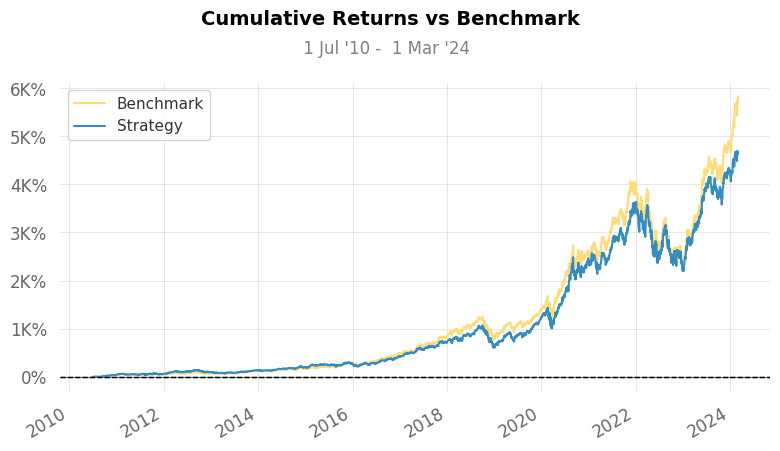

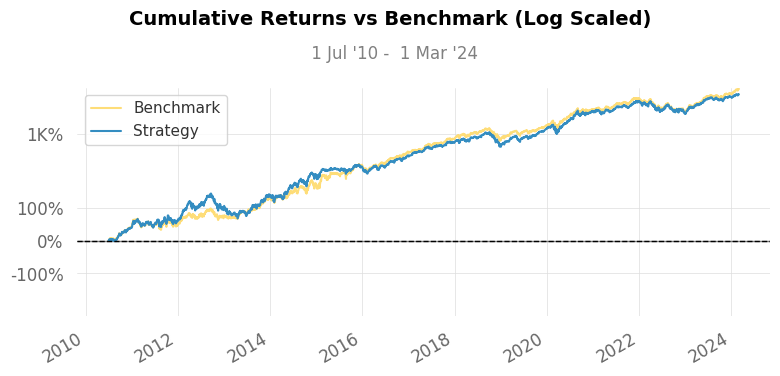

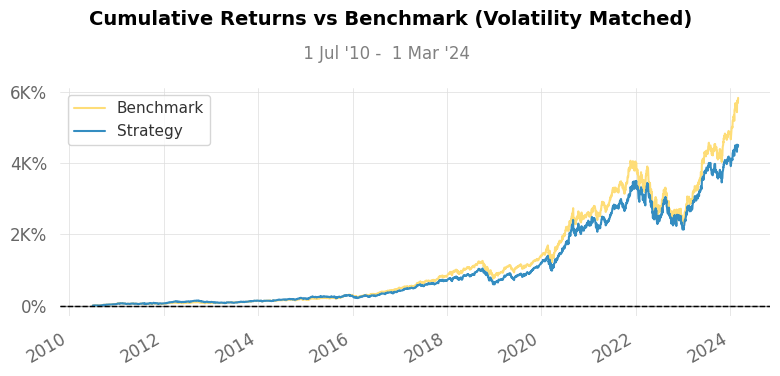

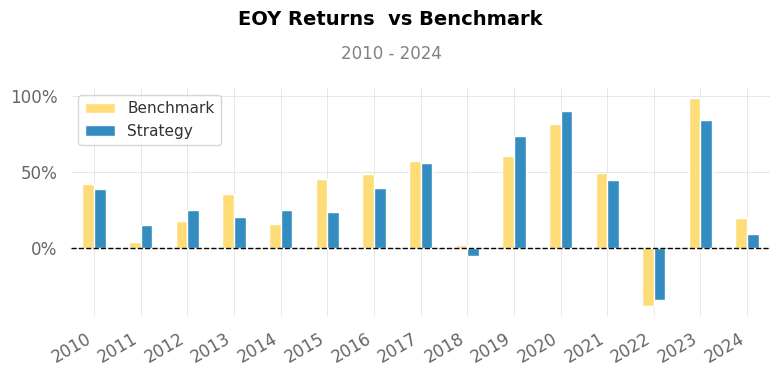

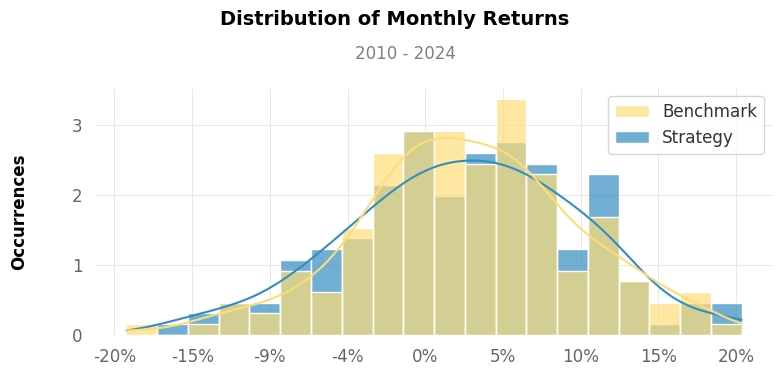

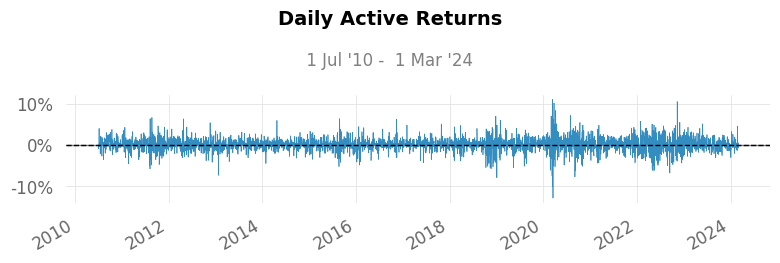

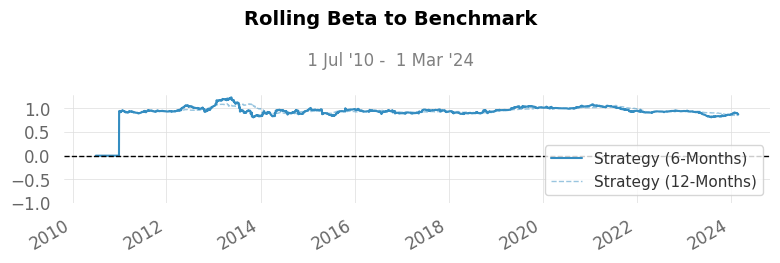

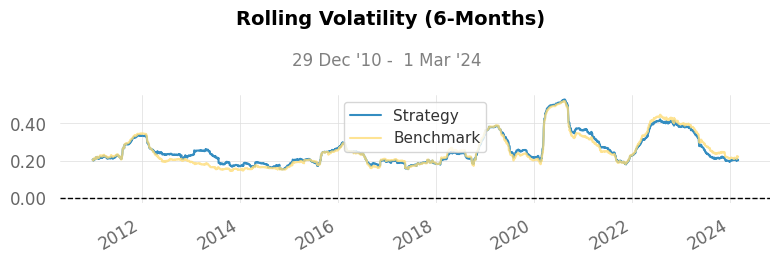

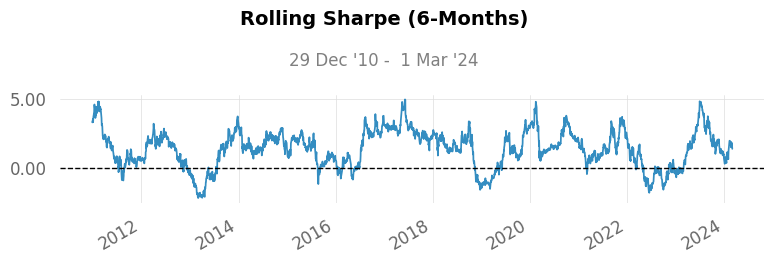

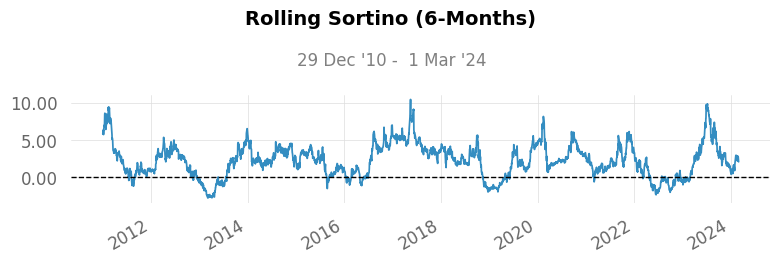

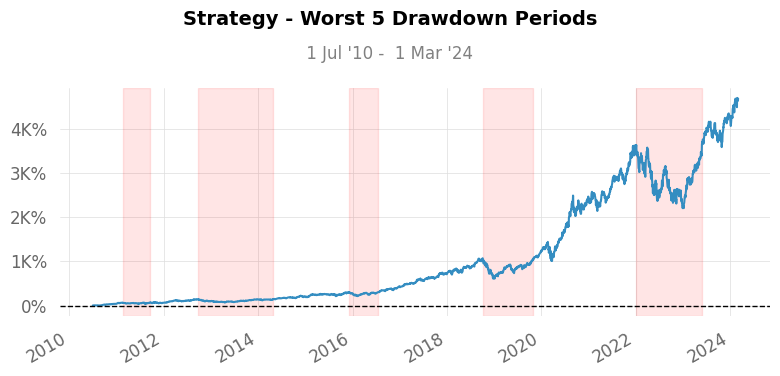

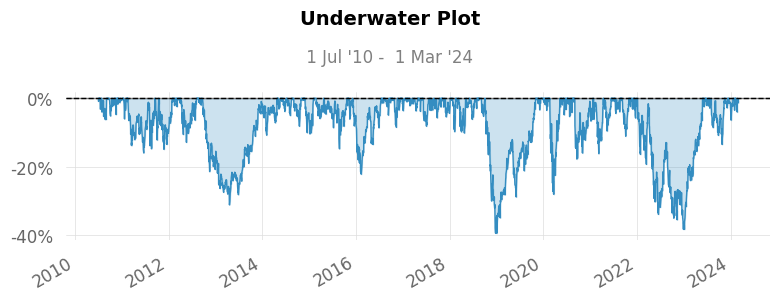

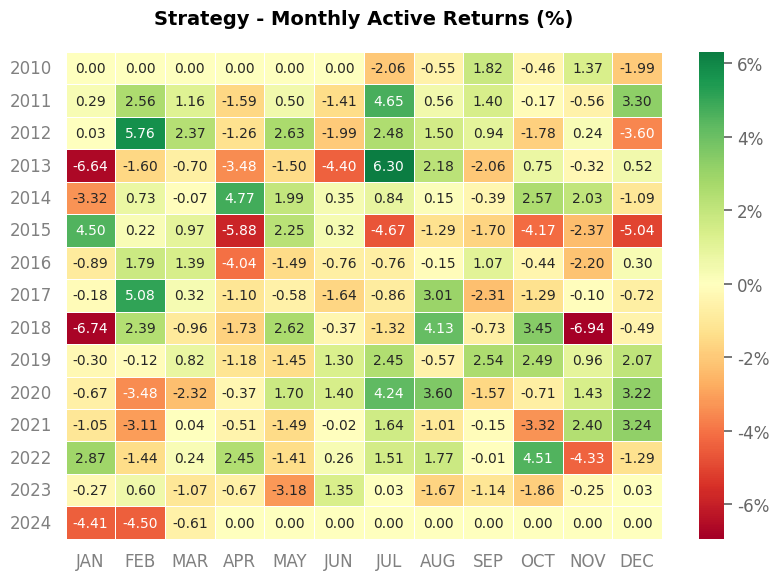

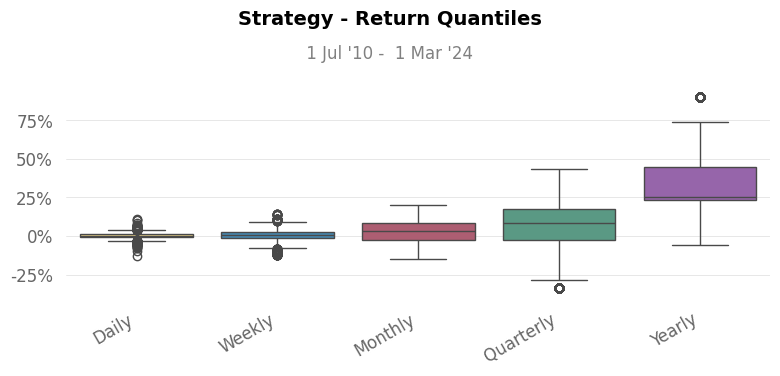

In [134]:
qs.reports.full(black_litterman_portfolio, benchmark = portfolio)